In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.simplefilter(action='ignore')

In [2]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

with open('../../output/cv_df_list_prospective_monthly.pkl', 'rb') as file:
    data_file = pickle.load(file)

data = data_file[6]
    
data = data.loc[data['province'] == 10]
data.tail()

,date_sick_year,month,province,cases,date_sick
44487,2012,8,10,666.0,2012-8-1
44563,2012,9,10,697.0,2012-9-1
44639,2012,10,10,1152.0,2012-10-1
44716,2012,11,10,1569.0,2012-11-1
44792,2012,12,10,1149.0,2012-12-1


In [6]:
date_sick = np.array(data['date_sick'])
year = np.array(data['date_sick_year'])
cases = np.array(data['cases'])

In [8]:
df = pd.DataFrame(list(zip(date_sick, cases)), columns=['ds', 'y'])

# fit the prophet model
model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df)

# extend the dataframe and get the predictions
future_dates = model.make_future_dataframe(periods=12, freq='M')
past_and_forecast = model.predict(future_dates)
forecast = past_and_forecast.tail(12)

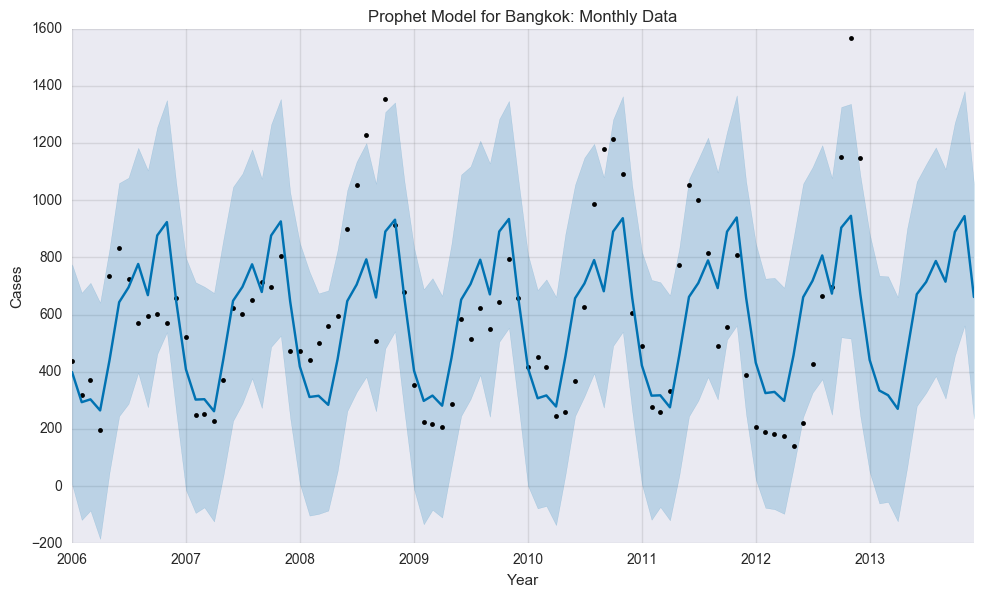

In [9]:
plot = model.plot(past_and_forecast)
plt.title('Prophet Model for Bangkok: Monthly Data')
plt.xlabel('Year')
plt.ylabel('Cases')

plt.show()